## Depth Analysis

In [6]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
depth = Dataset('dAtA\cmems_mod_ibi_wav_my_0.027deg_static_1756186965833.nc')

In [15]:
depth.variables.keys()
# depth['deptho'].shape

dict_keys(['latitude', 'longitude', 'mask', 'deptho'])

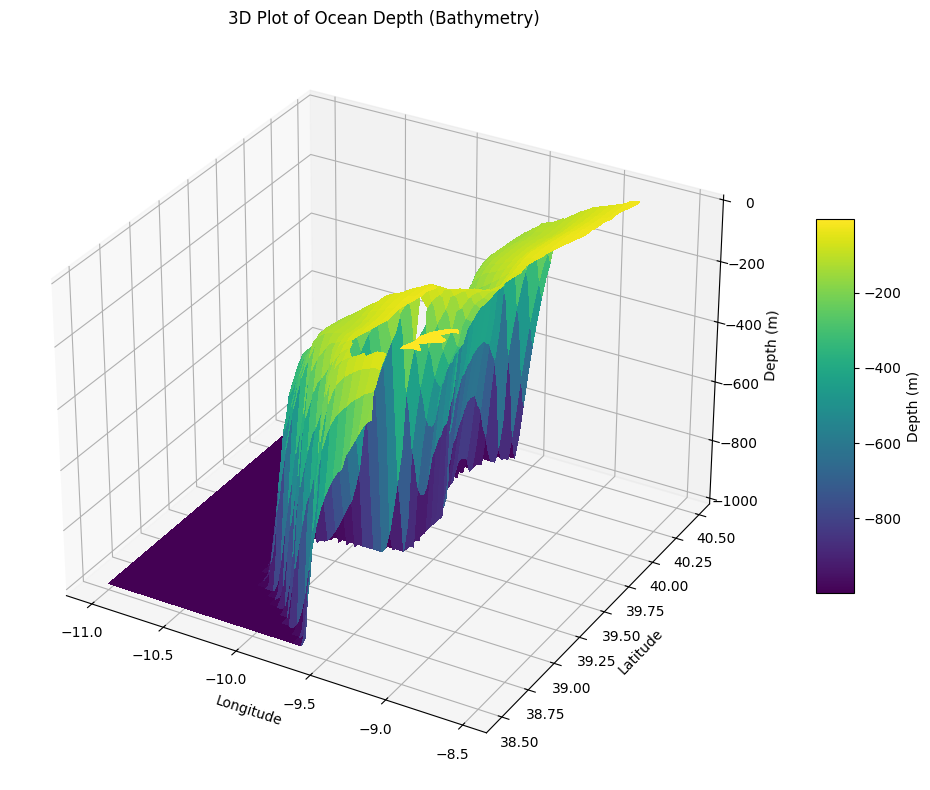

In [16]:
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
import numpy as np

# Load the NetCDF dataset
ds = xr.open_dataset("dAtA\cmems_mod_ibi_wav_my_0.027deg_static_1756186965833.nc")  # replace with your actual path

# Extract data
lat = ds['latitude'].values
lon = ds['longitude'].values
depth = ds['deptho'].values  # Assuming shape is [lat, lon] or similar

# Make sure lat/lon are 2D meshgrids
if lat.ndim == 1 and lon.ndim == 1:
    lon_grid, lat_grid = np.meshgrid(lon, lat)
else:
    lon_grid, lat_grid = lon, lat

# Optional: Mask values (e.g., land = NaN)
if 'mask' in ds:
    mask = ds['mask'].values
    depth = np.where(mask == 1, depth, np.nan)

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(lon_grid, lat_grid, -depth, cmap='viridis', linewidth=0, antialiased=False)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Depth (m)')
ax.set_title('3D Plot of Ocean Depth (Bathymetry)')

fig.colorbar(surf, shrink=0.5, aspect=10, label='Depth (m)')
plt.tight_layout()
plt.show()


In [22]:
# lat1,lon1 = np.meshgrid(depth['latitude'].values,depth['longitude'].values)
# fig = plt.figure(figsize=(12,10))
# ax = fig.add_subplot(111,projection = '3d')
# surf = ax.plot_surface(lat1,lon1, -depth['deptho'].values)



In [3]:
d_2020 = Dataset('Sea_surface/gebco_2020_n40.5_s38.5_w-11.0_e-8.5.nc')
d_2021 = Dataset('Sea_surface/gebco_2021_n40.5_s38.5_w-11.0_e-8.5.nc')
d_2022 = Dataset('Sea_surface/gebco_2022_n40.5_s38.5_w-11.0_e-8.5.nc')
d_2023 = Dataset('Sea_surface/gebco_2023_n40.5_s38.5_w-11.0_e-8.5.nc')
d_2024 = Dataset('Sea_surface/gebco_2024_n40.5_s38.5_w-11.0_e-8.5.nc')

In [4]:
d_2020.variables.keys()

dict_keys(['lat', 'lon', 'elevation'])

In [19]:
d_2020['elevation'].shape

(480, 600)

In [ ]:
# lat = d_2020.variables['lat'][:]
# lon = d_2020.variables['lon'][:]
# elev = d_2020.variables['elevation'][:] 

# import plotly.graph_objects as go
# # 'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Blues', 'Pinkyl'
# fig = plt.figure(figsize=(6, 5))
# fig = go.Figure(
#     data=go.Surface(z=elev, x=lon, y=lat, colorscale='magma')
# )
# fig.update_layout(title='Sea Surface', autosize=True, width=1200 , height = 1000 )

# fig.show()

In [5]:
z2020 = d_2020.variables["elevation"][:]
z2021 = d_2021.variables["elevation"][:]
z2022 = d_2022.variables["elevation"][:]
z2023 = d_2023.variables["elevation"][:]

# ---- 2020 → 2021 ----
if z2020.shape != z2021.shape:
    raise ValueError("Grids do not match (2020 vs 2021)!")
diff_2020_2021 = z2021 - z2020
pct_change_2020_2021 = (diff_2020_2021 / z2020) * 100

print("=== Sea Surface Comparison (2020 → 2021) ===")
print(f"2020 Height Range: {np.nanmin(z2020):.2f} to {np.nanmax(z2020):.2f}")
print(f"2021 Height Range: {np.nanmin(z2021):.2f} to {np.nanmax(z2021):.2f}")
print(f"Minimum Change: {np.nanmin(diff_2020_2021):.2f}")
print(f"Maximum Change: {np.nanmax(diff_2020_2021):.2f}")
print(f"Average % Change: {np.nanmean(pct_change_2020_2021):.2f}%")

# ---- 2021 → 2022 ----
if z2021.shape != z2022.shape:
    raise ValueError("Grids do not match (2021 vs 2022)!")
diff_2021_2022 = z2022 - z2021
pct_change_2021_2022 = (diff_2021_2022 / z2021) * 100

print("\n=== Sea Surface Comparison (2021 → 2022) ===")
print(f"2021 Height Range: {np.nanmin(z2021):.2f} to {np.nanmax(z2021):.2f}")
print(f"2022 Height Range: {np.nanmin(z2022):.2f} to {np.nanmax(z2022):.2f}")
print(f"Minimum Change: {np.nanmin(diff_2021_2022):.2f}")
print(f"Maximum Change: {np.nanmax(diff_2021_2022):.2f}")
print(f"Average % Change: {np.nanmean(pct_change_2021_2022):.2f}%")

# ---- 2022 → 2023 ----
if z2022.shape != z2023.shape:
    raise ValueError("Grids do not match (2022 vs 2023)!")
diff_2022_2023 = z2023 - z2022
pct_change_2022_2023 = (diff_2022_2023 / z2022) * 100

print("\n=== Sea Surface Comparison (2022 → 2023) ===")
print(f"2022 Height Range: {np.nanmin(z2022):.2f} to {np.nanmax(z2022):.2f}")
print(f"2023 Height Range: {np.nanmin(z2023):.2f} to {np.nanmax(z2023):.2f}")
print(f"Minimum Change: {np.nanmin(diff_2022_2023):.2f}")
print(f"Maximum Change: {np.nanmax(diff_2022_2023):.2f}")
print(f"Average % Change: {np.nanmean(pct_change_2022_2023):.2f}%")

# Close datasets
# d_2020.close()
# d_2021.close()
# d_2022.close()
# d_2023.close()

=== Sea Surface Comparison (2020 → 2021) ===
2020 Height Range: -4993.00 to 662.00
2021 Height Range: -5001.00 to 662.00
Minimum Change: -812.00
Maximum Change: 413.00
Average % Change: -1.31%

=== Sea Surface Comparison (2021 → 2022) ===
2021 Height Range: -5001.00 to 662.00
2022 Height Range: -4996.00 to 662.00
Minimum Change: -738.00
Maximum Change: 431.00
Average % Change: 0.26%

=== Sea Surface Comparison (2022 → 2023) ===
2022 Height Range: -4996.00 to 662.00
2023 Height Range: -4989.00 to 662.00
Minimum Change: -456.00
Maximum Change: 801.00
Average % Change: -2.50%


In [ ]:
# z2020 = d_2020.variables["elevation"][:]
# z2021 = d_2021.variables["elevation"][:]
# z2022 = d_2022.variables["elevation"][:]
# z2023 = d_2023.variables["elevation"][:]

# # --- 2020 → 2021 ---
# diff_2020_2021 = z2021 - z2020
# pct_change_2020_2021 = (diff_2020_2021 / z2020) * 100
# min_range_2020_2021 = np.nanmin(diff_2020_2021)
# max_range_2020_2021 = np.nanmax(diff_2020_2021)
# avg_pct_change_2020_2021 = np.nanmean(pct_change_2020_2021)

# # --- 2021 → 2022 ---
# diff_2021_2022 = z2022 - z2021
# pct_change_2021_2022 = (diff_2021_2022 / z2021) * 100
# min_range_2021_2022 = np.nanmin(diff_2021_2022)
# max_range_2021_2022 = np.nanmax(diff_2021_2022)
# avg_pct_change_2021_2022 = np.nanmean(pct_change_2021_2022)

# # --- 2022 → 2023 ---
# diff_2022_2023 = z2023 - z2022
# pct_change_2022_2023 = (diff_2022_2023 / z2022) * 100
# min_range_2022_2023 = np.nanmin(diff_2022_2023)
# max_range_2022_2023 = np.nanmax(diff_2022_2023)
# avg_pct_change_2022_2023 = np.nanmean(pct_change_2022_2023)

# # Close datasets
# # d_2020.close()
# # d_2021.close()
# # d_2022.close()
# # d_2023.close()

# # --- Prepare data for plotting ---
# years = ["2020→2021", "2021→2022", "2022→2023"]

# min_changes = [min_range_2020_2021, min_range_2021_2022, min_range_2022_2023]
# max_changes = [max_range_2020_2021, max_range_2021_2022, max_range_2022_2023]
# pct_changes = [avg_pct_change_2020_2021, avg_pct_change_2021_2022, avg_pct_change_2022_2023]

# # --- Plot ---
# plt.figure(figsize=(10,6))

# plt.plot(years, min_changes, marker='o', label="Minimum Change")
# plt.plot(years, max_changes, marker='o', label="Maximum Change")
# plt.plot(years, pct_changes, marker='o', label="Average % Change")

# plt.title("Sea Surface Elevation Changes (2020–2023)", fontsize=14)
# plt.xlabel("Year Comparison")
# plt.ylabel("Change (meters / %)")
# plt.grid(True, linestyle="--", alpha=0.6)
# plt.legend()
# plt.tight_layout()
# plt.show()

In [6]:
from netCDF4 import Dataset
import numpy as np

# Earth radius (meters)
R = 6371000  
depth_area = []

for ds in [d_2020, d_2021, d_2022, d_2023]:
    # Open file (example: 2020)
    elev = ds.variables["elevation"][:]
    lat = ds.variables["lat"][:]
    lon = ds.variables["lon"][:]
    # ds.close()

    # Convert to radians
    lat_rad = np.deg2rad(lat)
    lon_rad = np.deg2rad(lon)

    # Compute grid spacing (assumes regular grid)
    dlat = np.abs(lat_rad[1] - lat_rad[0])
    dlon = np.abs(lon_rad[1] - lon_rad[0])

    # Compute cell area per latitude (varies with cos(lat))
    # Shape: (lat, lon)
    cell_areas = (R**2) * dlon * dlat * np.cos(lat_rad[:, None])

    # ---- Example: compute area where depth < -100 m ----
    threshold = -100
    mask = elev < threshold
    area_below_threshold = np.nansum(cell_areas * mask)
    
    depth_area.append(area_below_threshold/1e6)

    print(f"Area with depth < {threshold} m (2020): {area_below_threshold/1e6:.2f} km²")
    
print(depth_area)

Area with depth < -100 m (2020): 30319.02 km²
Area with depth < -100 m (2020): 30240.31 km²
Area with depth < -100 m (2020): 30316.43 km²
Area with depth < -100 m (2020): 30356.60 km²
[30319.02419476706, 30240.30842082036, 30316.427150784355, 30356.601643900103]


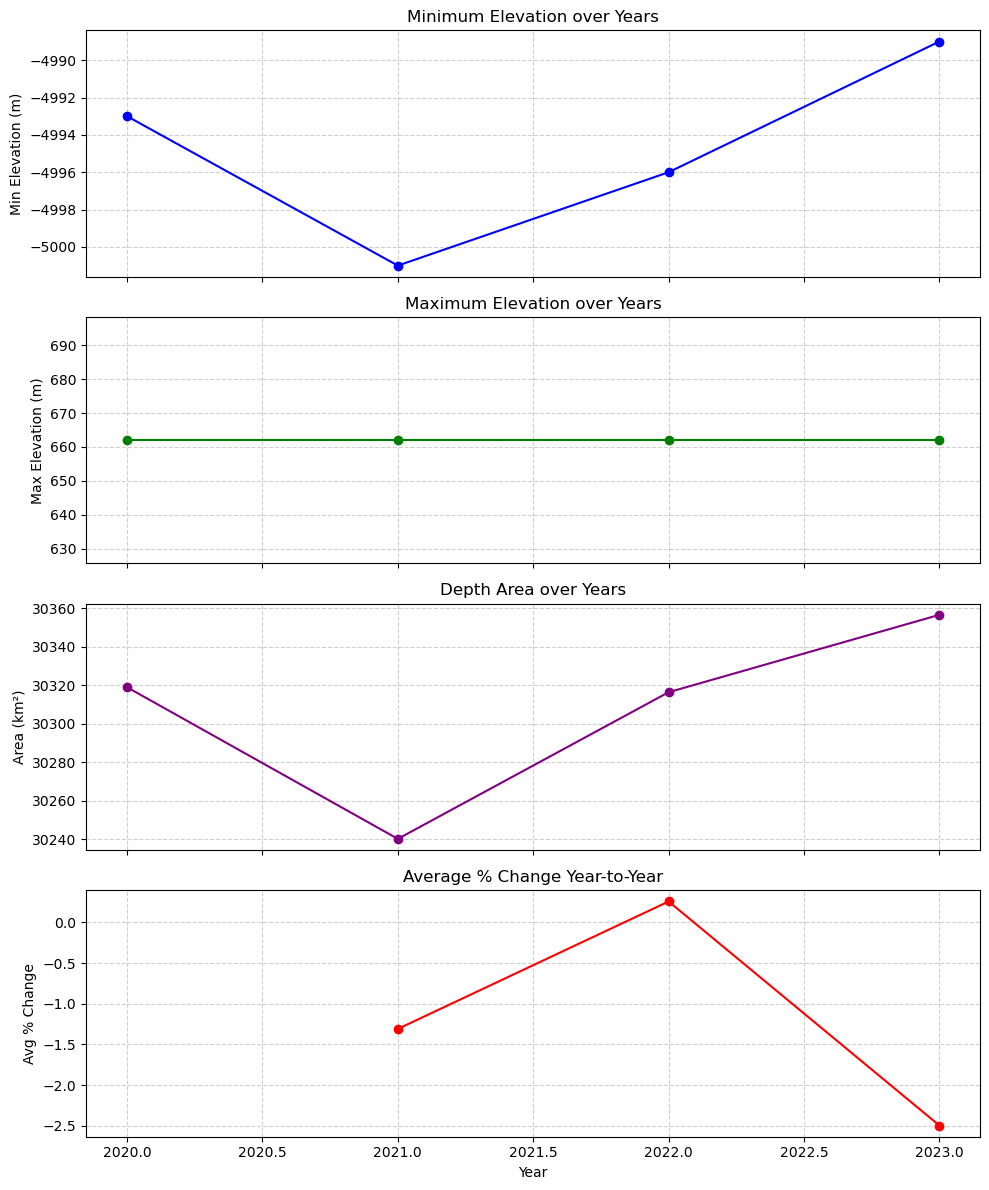

In [7]:
import matplotlib.pyplot as plt
import numpy as np

years = [2020, 2021, 2022, 2023]

mini = [np.nanmin(z2020), np.nanmin(z2021), np.nanmin(z2022), np.nanmin(z2023)]
maxi = [np.nanmax(z2020), np.nanmax(z2021), np.nanmax(z2022), np.nanmax(z2023)]
avg_pct_change = [
    np.nanmean(pct_change_2020_2021),
    np.nanmean(pct_change_2021_2022),
    np.nanmean(pct_change_2022_2023)
]

# Example placeholder: replace with your computed depth area values
# depth_area = [value2020, value2021, value2022, value2023]

fig, axs = plt.subplots(4, 1, figsize=(10,12), sharex=True)

# --- Min Elevation ---
axs[0].plot(years, mini, marker='o', color='blue')
axs[0].set_ylabel("Min Elevation (m)")
axs[0].set_title("Minimum Elevation over Years")
axs[0].grid(True, linestyle="--", alpha=0.6)

# --- Max Elevation ---
axs[1].plot(years, maxi, marker='o', color='green')
axs[1].set_ylabel("Max Elevation (m)")
axs[1].set_title("Maximum Elevation over Years")
axs[1].grid(True, linestyle="--", alpha=0.6)

# --- Depth Area ---
axs[2].plot(years, depth_area, marker='o', color='purple')
axs[2].set_ylabel("Area (km²)")
axs[2].set_title("Depth Area over Years")
axs[2].grid(True, linestyle="--", alpha=0.6)

# --- Avg % Change ---
axs[3].plot(years[1:], avg_pct_change, marker='o', color='red')
axs[3].set_ylabel("Avg % Change")
axs[3].set_title("Average % Change Year-to-Year")
axs[3].set_xlabel("Year")
axs[3].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

## Wave Analysis

In [13]:
from netCDF4 import Dataset
all_ds = Dataset(r'dAtA\cmems_mod_ibi_wav_my_0.027deg_PT1H-i_multi-vars_11.00W-8.53W_38.50N-40.47N_2020-01-01-2023-12-30.nc')
ds3 = Dataset(r'dAtA\cmems_mod_ibi_wav_my-aflux_0.027deg_P1H-i_TLA-TAUX-TAUY_11.00W-8.53W_38.50N-40.47N_2020-01-01-2023-12-30.nc')
ds3.variables.keys()

dict_keys(['TLA', 'TAUX', 'TAUY', 'latitude', 'longitude', 'time'])

In [3]:
print(ds3['TLA'].shape)
print(all_ds['time'][0])
print(ds3['time'][0])

(35040, 72, 90)
613608.0
613608.0


In [21]:
import numpy as np

variable_data = all_ds.variables['VMXL'][:]  # Load the data as a NumPy array

# Find the maximum value
max_value = np.max(variable_data)

# Find the index (multi-dimensional) of the maximum value
max_index = np.unravel_index(np.argmax(variable_data), variable_data.shape)
print("Max wave height",max_value)
print(max_index)

Max wave height 11.339999746531248
(np.int64(33694), np.int64(71), np.int64(0))


In [36]:
lat1=all_ds.variables["latitude"][71]
print(lat1)
print(all_ds.variables["longitude"][0])

40.472668
-10.999755


In [19]:
lat = all_ds.variables['latitude'][:]
lon = all_ds.variables['longitude'][:]
vcmx = all_ds.variables['VCMX'][:]

Lat, Lon = np.meshgrid(lon,lat)
Lat.shape

(72, 90)

In [18]:
vcmx.shape

(35040, 72, 90)

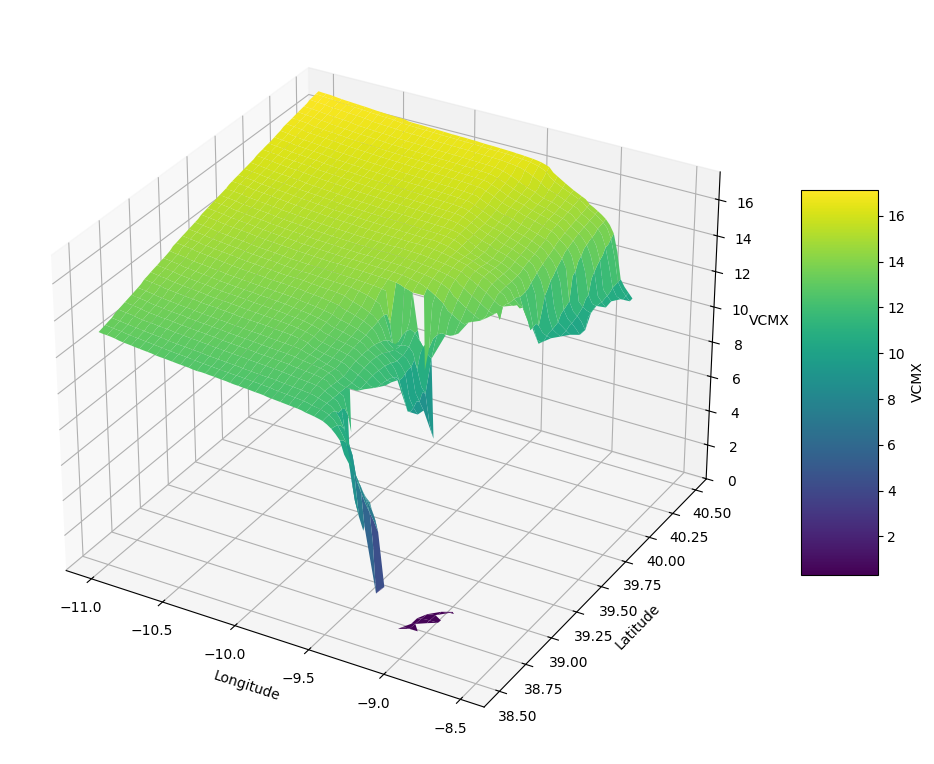

In [20]:
from mpl_toolkits.mplot3d import axis3d

fig = plt.figure(figsize=(12,10))
ax=fig.add_subplot(111, projection='3d')

# ax.view_init(roll=0, azim=0)

# lat = all_ds.variables['latitude'][:]
# lon = all_ds.variables['longitude'][:]
# vcmx = all_ds.variables['VCMX'][:]

# Lat, Lon = np.meshgrid(lat,lon)

surf = ax.plot_surface(Lat ,Lon,vcmx[33694,:,:],cmap='viridis',  edgecolor='none')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('VCMX')
fig.colorbar(surf, shrink=0.5, aspect=5, label='VCMX')

### Wave Height gif

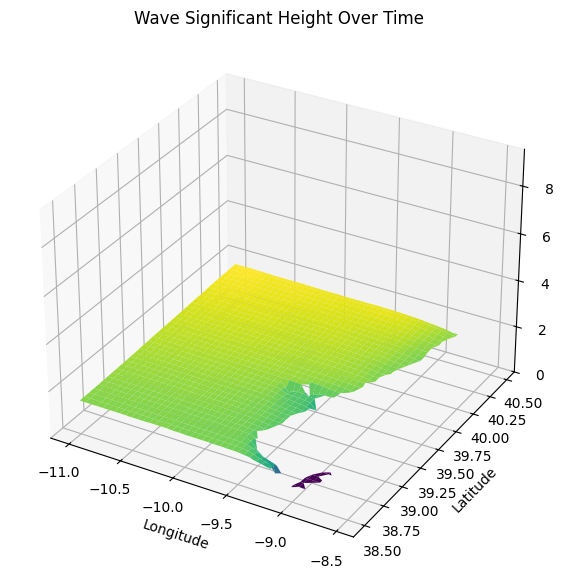

In [5]:
# from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits.mplot3d import Axes3D

# Load data
ds_height = all_ds
lat = ds_height.variables['latitude'][:]
lon = ds_height.variables['longitude'][:]
time = ds_height.variables['time'][:]
vhmo = ds_height.variables['VHM0'][:]

# Meshgrid
Lon, Lat = np.meshgrid(lon, lat)

# Choose interval to downsample frames
interval = 100
frames = list(range(0, len(time), interval))  # e.g., [0, 100, 200, ..., 20900]

# Create figure and axis
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
zmin, zmax = np.nanmin(vhmo), np.nanmax(vhmo)
ax.set_zlim(zmin, zmax)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Wave Height (m)')

# Initial surface
surf = ax.plot_surface(Lon, Lat, vhmo[0, :, :], cmap='viridis', edgecolor='none')
ax.set_title('Wave Significant Height Over Time')

# Update function
def update(frame_idx):
    global surf
    surf.remove()
    data = vhmo[frame_idx, :, :]
    surf = ax.plot_surface(Lon, Lat, data, cmap='viridis', edgecolor='none')
    ax.set_title(f'Wave Significant Height at time index {frame_idx}')
    return surf,

# Create animation (fps=10 → ~21 sec)
anim = FuncAnimation(fig, update, frames=frames, interval=100)

plt.show()

# Save as GIF
anim.save('wave_height_animation.gif', writer=PillowWriter(fps=10))
